# Importing libraries

In [4]:
import os
import numpy as np
import pandas as pd

import datetime as dt
import matplotlib.dates as mdates

from dash import Dash, dcc, html


class Data:
    def __init__(self, company, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
        self.company = company
        self.dataset_path = '.\dataset'

    def getPath(self):
        return os.path.join(self.dataset_path, self.company) + '.csv'
    
    def getModifedDataset(self):
        company_data = pd.read_csv(self.getPath(), parse_dates = ['Date'])
        return company_data[(company_data["Date"] > start_date) & (company_data["Date"] < end_date)].reset_index().drop(['index'], axis = 1)
    
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime(2020, 1, 1)

fb_data = Data('FB', start_date, end_date).getModifedDataset()
fb_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
1,2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2,2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
3,2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
4,2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


In [2]:
# Basic libraries
import os
import numpy as np
import pandas as pd

# Processing
import datetime as dt
import matplotlib.dates as mdates

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from mplfinance.original_flavor import candlestick_ohlc

# Reading datasets

## Here, we only take a look at stock prices coming from Faang companies

In [4]:
stock_dir = '.\dataset'
companies_symbols = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']

stocks_path = {}

for company_symbol in companies_symbols:
    stocks_path[company_symbol] = os.path.join(stock_dir, company_symbol) + '.csv'
    
stocks_path

{'FB': '.\\dataset\\FB.csv',
 'AAPL': '.\\dataset\\AAPL.csv',
 'AMZN': '.\\dataset\\AMZN.csv',
 'NFLX': '.\\dataset\\NFLX.csv',
 'GOOGL': '.\\dataset\\GOOGL.csv'}

In [5]:
# Function to get data from a specific date interval
def specific_date_data(stock_path, start_date, end_date):
    company_data = pd.read_csv(stock_path, parse_dates = ['Date'])
    return company_data[(company_data["Date"] > start_date) & (company_data["Date"] < end_date)].reset_index().drop(['index'], axis = 1)

In [6]:
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime(2020, 1, 1)

fb_data = specific_date_data(stocks_path['FB'], start_date, end_date)
fb_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
1,2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2,2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
3,2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
4,2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


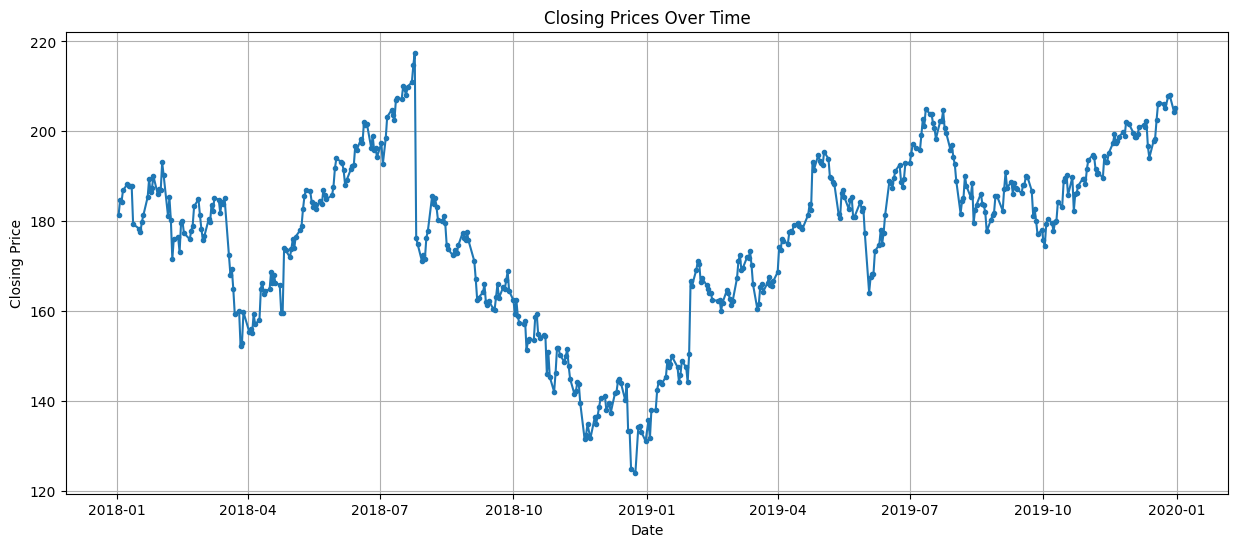

In [7]:
fb_data['Date'] = pd.to_datetime(fb_data['Date'])

plt.figure(figsize=(15, 6))
plt.plot(fb_data['Date'], fb_data['Close'], marker='.')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

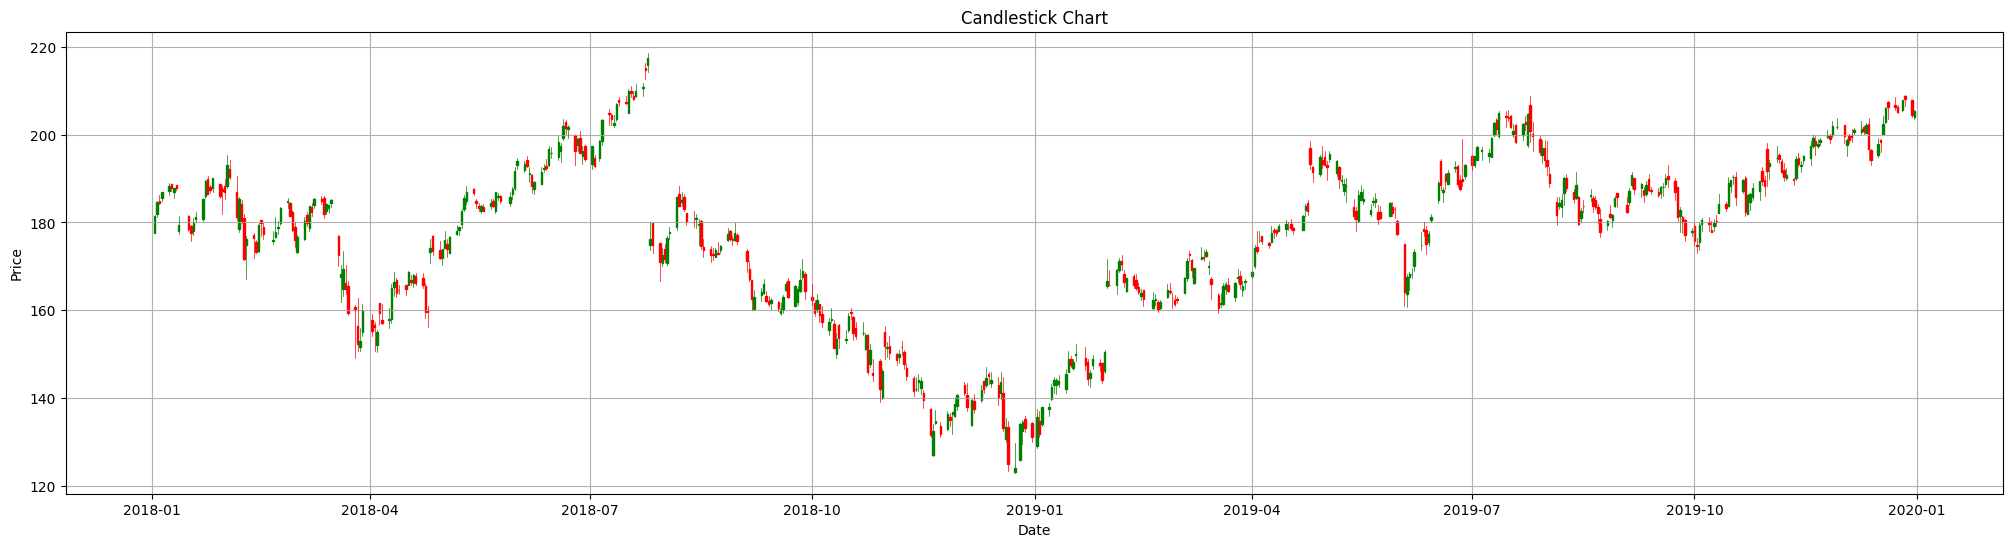

In [8]:
# Convert 'Date' column to matplotlib date format
matplotlib_date = mdates.date2num(fb_data['Date'])

ohlc = np.vstack((matplotlib_date, fb_data['Open'], fb_data['High'], fb_data['Low'], fb_data['Close'])).T

plt.figure(figsize=(25, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

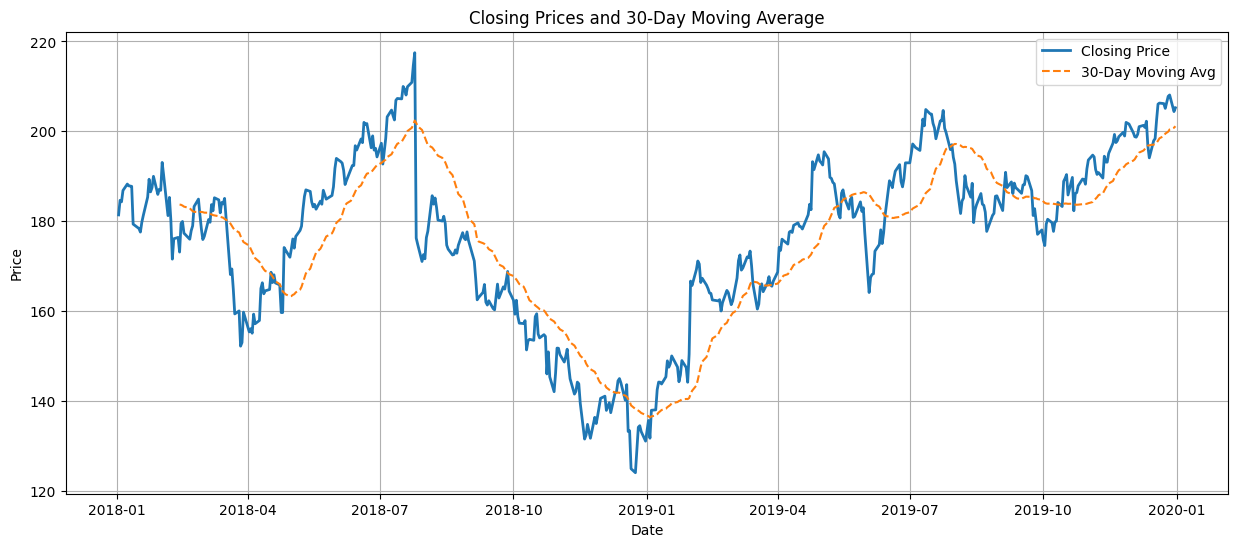

In [9]:
# Closing Prices and Moving Average plot

window = 30
plt.figure(figsize=(15, 6))
plt.plot(fb_data['Date'], fb_data['Close'], label='Closing Price', linewidth=2)
plt.plot(fb_data['Date'], fb_data['Close'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()